In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. The dataset can be downloaded [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). 

In this analysis we'll explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.

Alongside we'll also work on improving plot aesthetics. 

In [3]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [4]:
men_degrees = 100 - women_degrees.iloc[:,1:]
men_degrees['Year'] = women_degrees['Year']
men_degrees = men_degrees[women_degrees.columns]
men_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,95.770202,88.078995,40.3,70.911637,90.935561,64.7,86.4,25.464672,99.2,34.429077,26.2,22.9,62.0,86.2,55.6,31.6,63.2
1,1971,94.547203,87.996894,40.1,70.605597,90.496813,64.5,86.4,25.850796,99.0,35.443515,26.1,24.5,61.0,85.1,53.8,34.5,63.8
2,1972,92.579290,86.785406,39.6,70.189779,89.441038,63.4,85.1,26.445480,98.8,36.335737,25.4,23.1,59.8,85.2,52.4,37.4,63.9
3,1973,90.346398,85.208387,39.8,68.852085,87.195398,61.6,83.6,26.498186,98.4,37.058498,25.1,22.6,59.1,83.5,49.6,35.7,63.6
4,1974,85.925377,82.555312,38.1,67.003817,83.795150,59.5,81.1,26.663189,97.8,37.586588,24.7,22.1,58.2,81.8,47.4,33.9,62.7


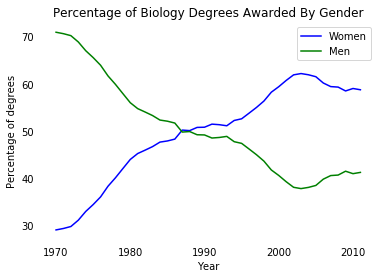

In [5]:
fig,ax = plt.subplots()
women_degrees.plot(x='Year', y='Biology',kind='line', ax = ax, label='Women', c='blue')
men_degrees.plot(x='Year', y='Biology',kind='line', ax = ax, label='Men', c='green')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.set_ylabel('Percentage of degrees')
ax.legend(loc='upper right')
# Remove all of the tick marks
ax.tick_params(bottom=False, top=False, left=False, right=False) 
# Remove all the spines 
for key,spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

OrderedDict([(u'left', <matplotlib.spines.Spine object at 0x7f7dec3adc50>), (u'right', <matplotlib.spines.Spine object at 0x7f7dec397890>), (u'bottom', <matplotlib.spines.Spine object at 0x7f7dec344a90>), (u'top', <matplotlib.spines.Spine object at 0x7f7dec344f50>)])


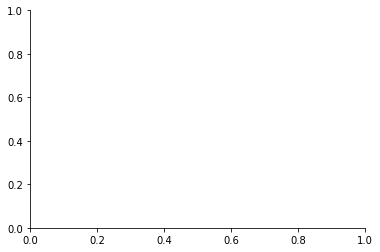

In [6]:
# manipulating 1 spine at a time

fig,ax = plt.subplots()
print(ax.spines)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

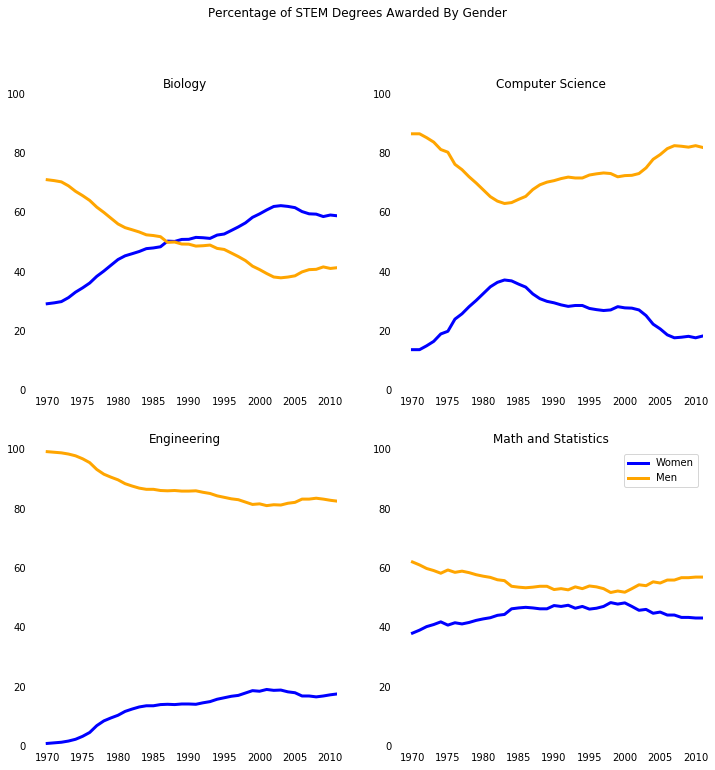

In [8]:
stem = ['Biology','Computer Science','Engineering','Math and Statistics']

fig = plt.figure(figsize=(12,12))
#cb_dark_blue = (0/255,107/255,164/255)
#cb_orange = (255/255, 128/255, 14/255)

for idx,name in enumerate(stem):
    ax_name = 'ax' + str(idx)
    ax_name = fig.add_subplot(2,2,(idx+1))
    # select colors from a specific palette
    # women_degrees.plot(x='Year', y=name,kind='line', ax = ax_name, label='Women', c=cb_dark_blue,legend=None,linewidth=3)
    # men_degrees.plot(x='Year', y=name,kind='line', ax = ax_name, label='Men', c=cb_orange,legend=None,linewidth=3)
    women_degrees.plot(x='Year', y=name,kind='line', ax = ax_name, label='Women', c="blue",legend=None,linewidth=3)
    men_degrees.plot(x='Year', y=name,kind='line', ax = ax_name, label='Men', c="orange",legend=None,linewidth=3)
    ax_name.set_ylim(0,100)
    ax_name.set_xlim(1968,2011)
    ax_name.set_xlabel("")
    ax_name.set_title(name)
    
    ax_name.tick_params(bottom=False, top=False, left=False, right=False) 
    for key,spine in ax_name.spines.items():
        spine.set_visible(False)

        
fig.suptitle('Percentage of STEM Degrees Awarded By Gender')

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')

plt.show()

We can conclude that the gender gap in Computer Science and Engineering have big gender gaps while the gap in Biology and Math and Statistics is quite small. In addition, the first two degree categories are dominated by men while the latter degree categories are much more balanced.

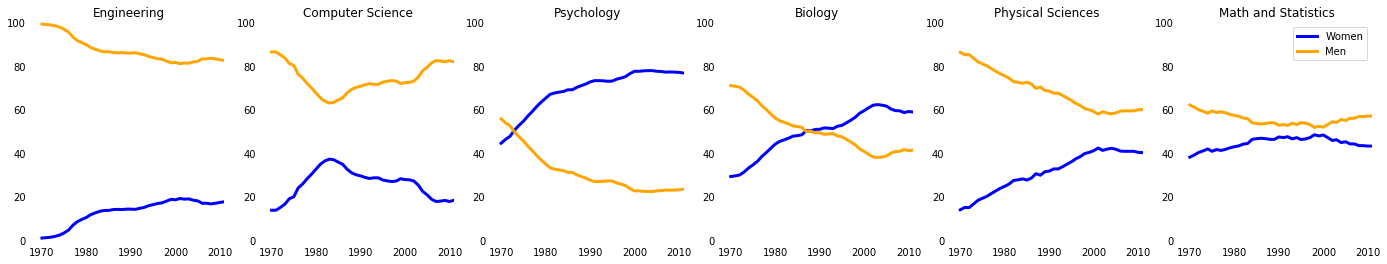

In [9]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
fig = plt.figure(figsize=(24,4))
#cb_dark_blue = (0/255,107/255,164/255)
#cb_orange = (255/255, 128/255, 14/255)
for idx,name in enumerate(stem_cats):
    ax_name = 'ax' + str(idx)
    ax_name = fig.add_subplot(1,6,(idx+1))
    women_degrees.plot(x='Year', y=name,kind='line', ax = ax_name, label='Women', c='blue',legend=None,linewidth=3)
    men_degrees.plot(x='Year', y=name,kind='line', ax = ax_name, label='Men', c='orange',legend=None,linewidth=3)
    ax_name.set_ylim(0,100)
    ax_name.set_xlim(1968,2011)
    ax_name.set_xlabel("")
    ax_name.set_title(name)
    
    ax_name.tick_params(bottom=False, top=False, left=False, right=False) 
    for key,spine in ax_name.spines.items():
        spine.set_visible(False)

        
#fig.suptitle('Percentage of STEM Degrees Awarded By Gender')

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')

plt.show()

Note : To add text annotations to a matplotlib plot, we use the Axes.text() method.
This method has a few required parameters:

- x: x-axis coordinate (as a float)
- y: y-axis coordinate (as a float)
- s: the text we want in the annotation (as a string value)

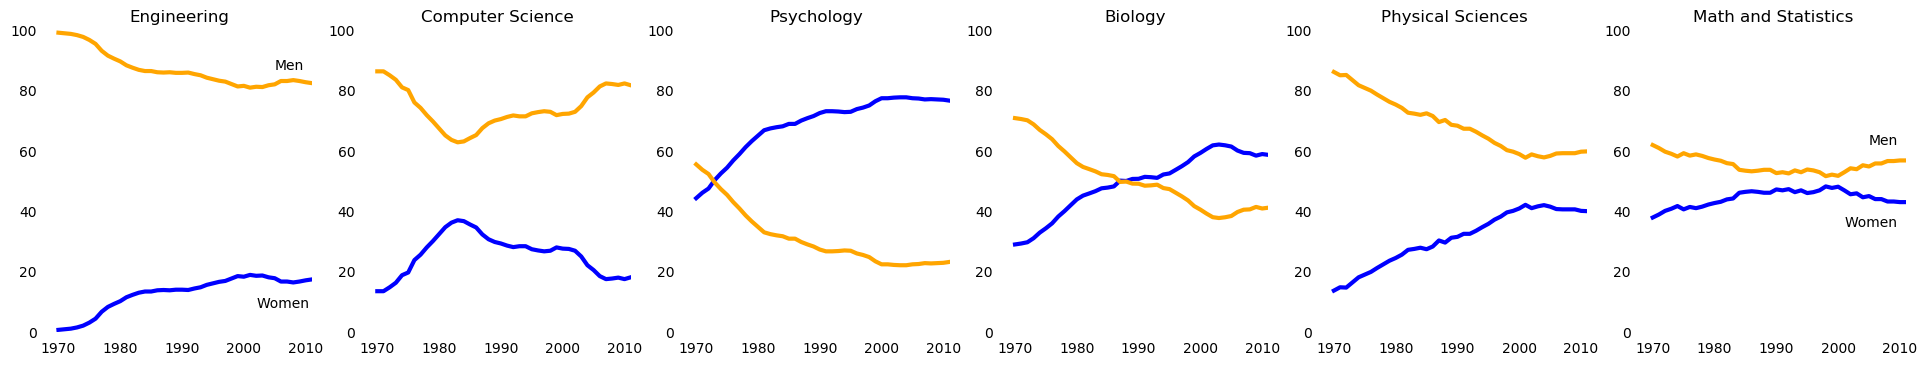

In [10]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
fig = plt.figure(figsize=(24,4), dpi =100)
#cb_dark_blue = (0/255,107/255,164/255)
#cb_orange = (255/255, 128/255, 14/255)
for idx,name in enumerate(stem_cats):
    ax_name = 'ax' + str(idx);
    ax_name = fig.add_subplot(1,6,(idx+1))
    women_degrees.plot(x='Year', y=name,kind='line', ax = ax_name, label='Women', c='blue',legend=None,linewidth=3)
    men_degrees.plot(x='Year', y=name,kind='line', ax = ax_name, label='Men', c='orange',legend=None,linewidth=3)
    ax_name.set_ylim(0,100)
    ax_name.set_xlim(1968,2011)
    ax_name.set_xlabel("")
    ax_name.set_title(name)
    
    ax_name.tick_params(bottom=False, top=False, left=False, right=False) 
    for key,spine in ax_name.spines.items():
        spine.set_visible(False)
        
    if idx == 0:
        ax_name.text(2005, 87, 'Men')
        ax_name.text(2002, 8, 'Women')
    elif idx == 5:
        ax_name.text(2005, 62, 'Men')
        ax_name.text(2001, 35, 'Women')

        
#fig.suptitle('Percentage of STEM Degrees Awarded By Gender')

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
#plt.legend(loc='upper right')

plt.show()

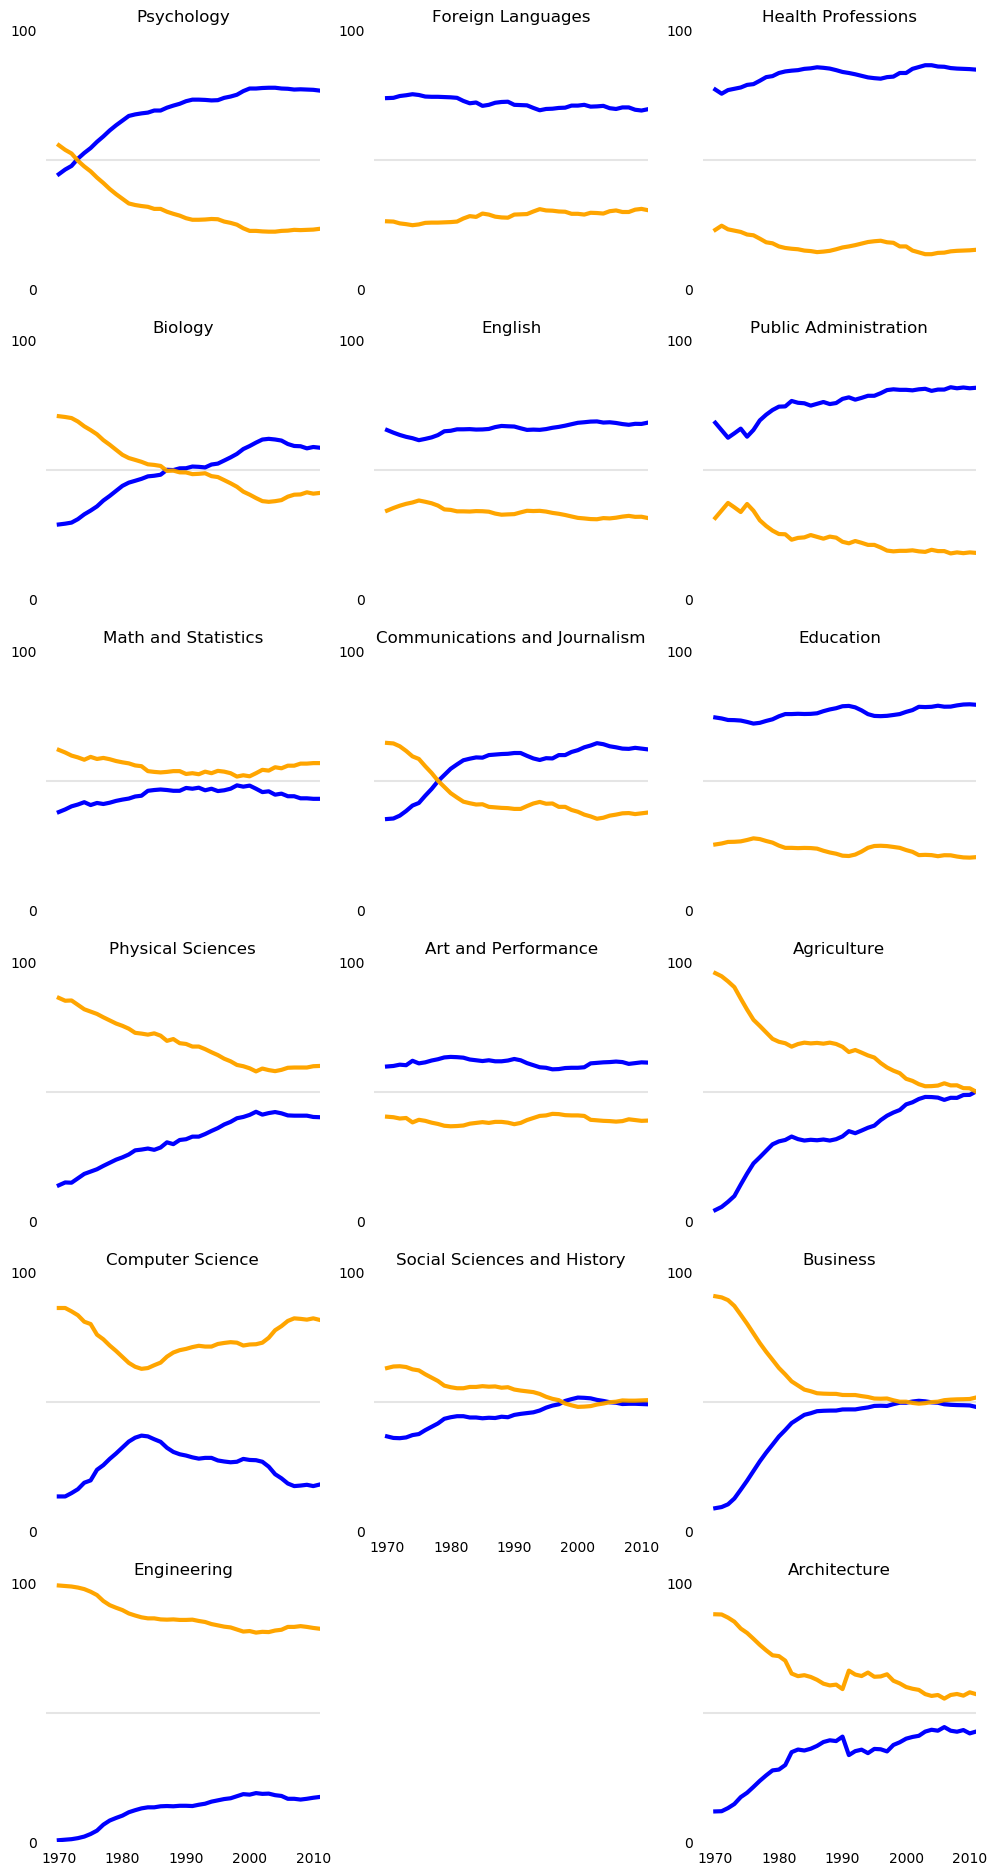

In [12]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

l = [stem_cats, lib_arts_cats, other_cats]

fig = plt.figure(figsize=(12,24), dpi =100)

for idx1, cats1 in enumerate(l):
    i = 0 
    
    for j in range(idx1+1,idx1+17, 3):
        

        if len(cats1) <= i :
            break
            
        #print i,cats1[i], j    
        ax_name = 'ax' + str(j);
        ax_name = fig.add_subplot(6,3,j)
        women_degrees.plot(x='Year', y=cats1[i],kind='line', ax = ax_name, label='Women', c='blue',legend=None,linewidth=3)
        men_degrees.plot(x='Year', y=cats1[i] ,kind='line', ax = ax_name, label='Men', c='orange',legend=None,linewidth=3)
        
        ax_name.set_ylim(0,100)
        ax_name.set_xlim(1968,2011)
        ax_name.set_xlabel("")
        ax_name.set_yticks([0,100]) #enable only 0 and 100 to be displayed on Y - axis
        ax_name.set_title(cats1[i])
        ax_name.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.1) # alpha - transparency
        
        ax_name.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
        if j in [16,14,18] :
            ax_name.tick_params(labelbottom='on')
        
        ax_name.tick_params(bottom=False, top=False, left=False, right=False) 
        for key,spine in ax_name.spines.items():
            spine.set_visible(False)

        i = i + 1 

        
plt.savefig('./biology_degrees.png')
plt.show() 